finished calculation for R=0.1
finished calculation for R=0.6210526315789474
finished calculation for R=1.142105263157895
finished calculation for R=1.6631578947368424
finished calculation for R=2.18421052631579
finished calculation for R=2.7052631578947373
finished calculation for R=9.478947368421053
finished calculation for R=10.0


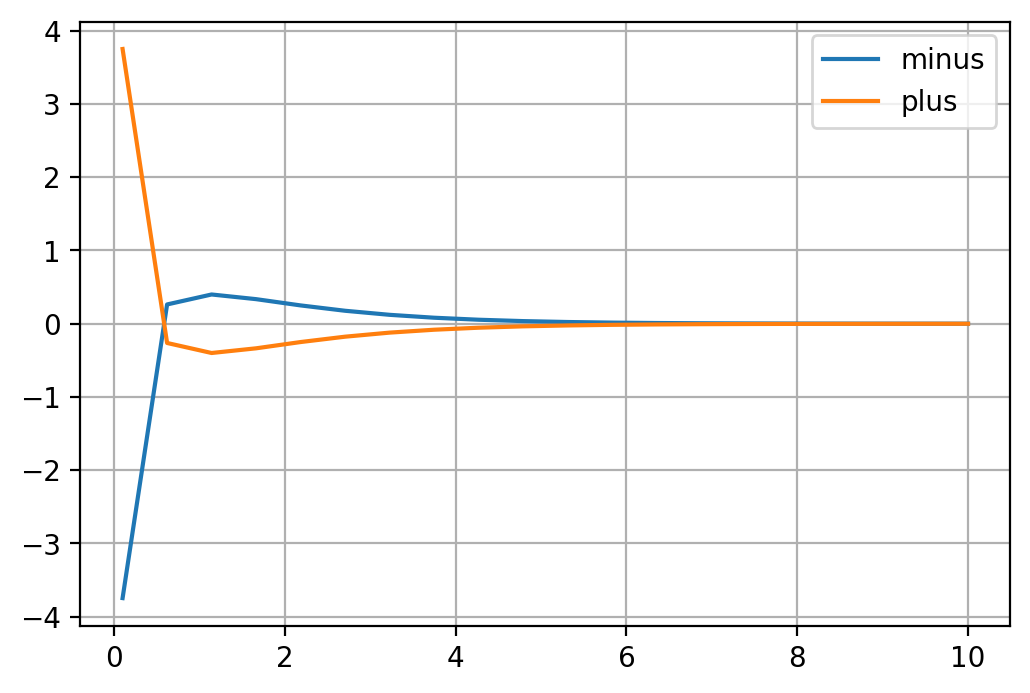

In [9]:
import numpy as np
from scipy.integrate import dblquad
import matplotlib.pyplot as plt

def S(R):
    func = lambda r,z: 1/np.pi*np.exp(-np.sqrt(r**2+z**2) - np.sqrt(r**2+(z+R)**2)) * r * 2*np.pi ##2pi r from phi integration andjacobian det
    return dblquad(func, -100, 100, lambda z: -100, lambda z: 100)[0]


def Haa(R):
    func = lambda r,z: 1/np.pi*np.exp(-2*np.sqrt(r**2+z**2))*(-0.5 - 1/np.sqrt(r**2+(z+R)**2)+1/R) * 2*np.pi*r
    left = dblquad(func, -100, 100, lambda z: -100, lambda z: -R-0.001)[0] 
    right = dblquad(func, -100, 100, lambda z: -R+0.001, lambda z: 100)[0] 
    return left + right

def Hab(R):
    func = lambda r,z: 1/np.pi*np.exp(-np.sqrt(r**2+z**2) - np.sqrt(r**2+(z+R)**2))*(-0.5 - 1/np.sqrt(r**2+z**2) + 1/R)
    left = dblquad(func, -100, 100, lambda z: -100, lambda z: -R-0.001)[0] 
    right = dblquad(func, -100, 100, lambda z: -R+0.001, lambda z: 100)[0] 
    return left + right

    
def Eplus(R):
    return (Haa(R) + Hab(R))/(1+S(R))

def Eminus(R):
    res = (Haa(R)-Hab(R))/(1-S(R))
    return res

"""
R = np.linspace(0.1,3,5)

nrgs = np.array([])

for r in R:
    nrgs = np.append(Eplus(r),nrgs)

plt.plot(R,nrgs)
"""


R = np.linspace(0.1,10,20)
Em = np.array([])
Ep = np.array([])
for rr in R:
    Em = np.append(Em,Eminus(rr))
    Ep = np.append(Ep,Eplus(rr))
    print("finished calculation for R={}".format(rr))
plt.figure(dpi=200)
plt.grid()
plt.plot(R,Em,label = "minus")
plt.plot(R,Ep, label = "plus")
plt.legend(loc=1)
plt.savefig("energies.pdf")


